In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

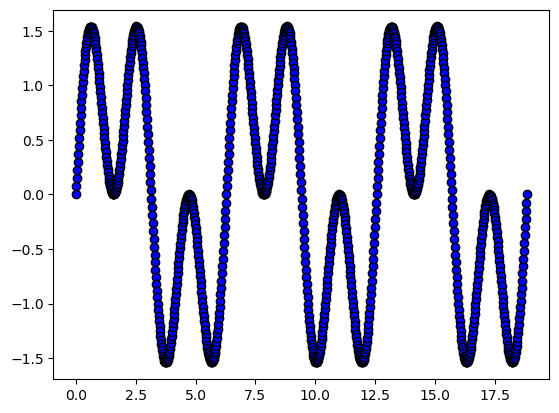

In [2]:
x = np.linspace(0, 6 * np.pi, 1000)
y = np.sin(x) + np.sin(3 * x)

plt.scatter(x, y, c='blue', edgecolor='black')
plt.show()

# Many to one

In [3]:
length_sequence = 10
inputs, targets = [], []

for i in range(len(x)):
    try:
        row = y[i: i + length_sequence]
        target = y[i + length_sequence]
    except:
        continue
    inputs.append([[j] for j in row])
    targets.append([target])

inputs = np.array(inputs)
targets = np.array(targets)

In [4]:
print(len(inputs), len(targets))
print(inputs[0], targets[0])

990 990
[[0.        ]
 [0.07544235]
 [0.15069676]
 [0.22557587]
 [0.29989347]
 [0.37346512]
 [0.44610867]
 [0.51764485]
 [0.58789783]
 [0.65669576]] [0.7238713]


In [5]:
def mse(y_pred, y):
    return np.mean((y_pred - y) ** 2)

def grad_mse(y_pred, y):
    return y_pred - y

def output_activation(z):
    return z

def deriv_output_activation(z):
    return 1

In [6]:
from LSTMClass import LSTM

input_units = length_sequence
output_units = 1
hidden_units = 20
learning_rate = 0.01

lstm = LSTM(input_units=input_units, output_units=output_units, 
            learning_rate=learning_rate, hidden_units=hidden_units, 
            loss=mse, grad_loss=grad_mse, output_activation=output_activation)

In [7]:
epochs = 100
cost = []

for epoch in range(epochs):
    
    loss = 0
    
    for input_t, target_t in zip(inputs, targets):
        lstm.forward([input_t])
        lstm.backward([target_t])
        lstm.optimize()
        loss += lstm.loss_pass
    cost.append(loss / len(inputs))
    
    if not epoch % 10:
        print(loss / len(inputs))

0.573711128083616
0.01345950226366323
0.0011067338292728138
0.000528979028623251
0.00037565862959734503
0.00030555718566269624
0.00026568996462876385
0.0002409065948994196
0.0002247642621260137
0.0002138404855184235


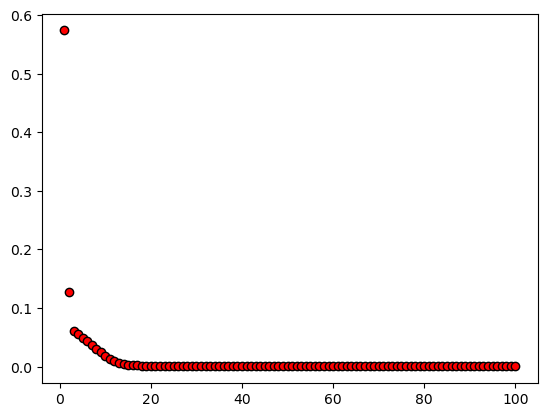

In [8]:
plt.scatter(range(1, epochs + 1), cost, edgecolor='black', c='red')
plt.show()

In [9]:
predictions = []

for x_t in inputs:
    lstm.forward([x_t])
    predict = [ouputs[1] for ouputs in lstm.outputs.items()]
    predictions.append(predict)
    
print(predictions[:4])

[[array([[0.71265696]])], [array([[0.77808666]])], [array([[0.84152746]])], [array([[0.90275338]])]]


In [10]:
for target in targets[:4]:
    print(target)

[0.7238713]
[0.78926211]
[0.85271141]
[0.9140684]


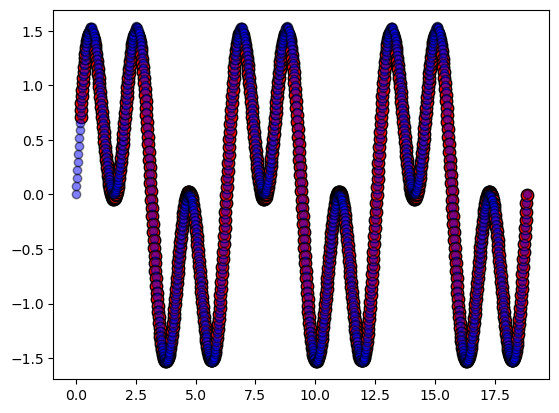

In [11]:
for i, prediction in enumerate(predictions):
    slice_x = x[i + length_sequence]
    plt.scatter(slice_x, prediction, c='red', 
                edgecolor='black', s=80)
    
plt.scatter(x, y, alpha=0.5, c='blue', edgecolor='black')
plt.show()

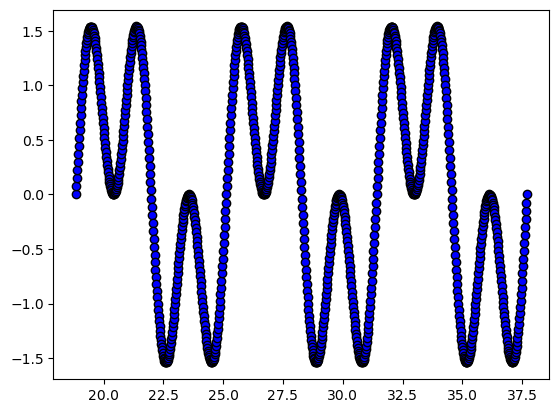

In [12]:
x_pred = np.linspace(x[-1], 2 * x[-1], 1000)
y_pred = np.sin(x_pred) + np.sin(3 * x)

plt.scatter(x_pred, y_pred, c='blue', edgecolor='black')
plt.show()

In [13]:
inputs_test, targets_test = [], []

for i in range(len(x) - length_sequence):
    row = y_pred[i: i + length_sequence]
    target = y_pred[i + length_sequence]
    inputs_test.append([[j] for j in row])
    targets_test.append([target])

inputs = np.array(inputs_test)
targets = np.array(targets_test)

In [14]:
inputs_test[0], targets_test[0]

([[-7.347880794884119e-16],
  [0.07544235396825993],
  [0.15069676410778818],
  [0.22557586950564082],
  [0.2998934732199748],
  [0.3734651196204546],
  [0.44610866617112993],
  [0.517644847830953],
  [0.5878978322708395],
  [0.6566957641354834]],
 [0.7238712966132205])

In [15]:
predictions_test = []

for x_t in inputs_test:
    lstm.forward([x_t])
    predict = [ouputs[1] for ouputs in lstm.outputs.items()]
    predictions_test.append(predict)

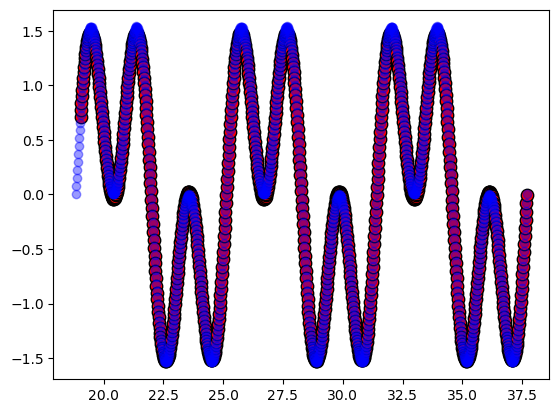

In [16]:
for i, prediction in enumerate(predictions_test):
    
    slice_x = x_pred[i + length_sequence]
    plt.scatter(slice_x, prediction, c='red', 
                edgecolor='black', s=80)
    
plt.scatter(x_pred, y_pred, alpha=0.4, c='blue')
plt.show()

**Perfect overlap**

# Many to many

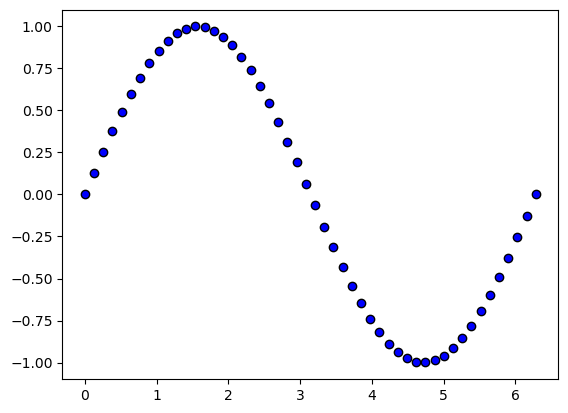

In [17]:
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)

plt.scatter(x, y, edgecolor='black', c='blue')
plt.show()

In [18]:
length_sequence = 10
inputs, targets = [], []

for i in range(len(x)):
    row = y[i: i + length_sequence]
    target = y[i + 1: i + length_sequence + 1]
    if target.shape[0] < length_sequence:
        continue
    inputs.append([[j] for j in row])
    targets.append([[j] for j in target])

inputs = np.array(inputs)
targets = np.array(targets)

In [19]:
print(len(inputs), len(targets))
print(inputs[0], targets[0])

40 40
[[0.        ]
 [0.12787716]
 [0.25365458]
 [0.375267  ]
 [0.49071755]
 [0.59811053]
 [0.69568255]
 [0.78183148]
 [0.85514276]
 [0.91441262]] [[0.12787716]
 [0.25365458]
 [0.375267  ]
 [0.49071755]
 [0.59811053]
 [0.69568255]
 [0.78183148]
 [0.85514276]
 [0.91441262]
 [0.95866785]]


In [20]:
input_units = length_sequence
output_units = length_sequence
hidden_units = 20
learning_rate = 0.05

lstm = LSTM(input_units=input_units, output_units=output_units, 
            learning_rate=learning_rate, hidden_units=hidden_units, 
            loss=mse, grad_loss=grad_mse, output_activation=output_activation)

In [21]:
epochs = 100
cost = []

for epoch in range(epochs):
    
    loss = 0
    
    for input_t, target_t in zip(inputs, targets):
        lstm.forward([input_t])
        lstm.backward([target_t])
        lstm.optimize()
        loss += lstm.loss_pass
    cost.append(loss / len(inputs))
    
    if not epoch % 10:
        print(loss / len(inputs))

0.5012078932072266
0.1335242416893448
0.03274526100865768
0.019783251364091658
0.012219478614433527
0.008045130565071468
0.0048642941643043764
0.0026749991567833155
0.0014540925978821528
0.0008747023220199735


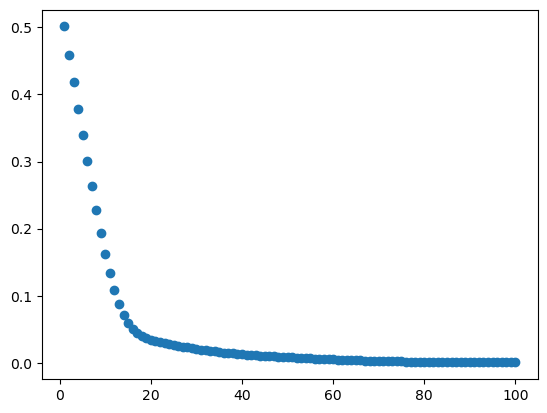

In [22]:
plt.scatter(range(1, epochs + 1), cost)
plt.show()

In [23]:
predictions = []

for x_t in inputs:
    lstm.forward([x_t])
    predict = [ouputs[1] for ouputs in lstm.outputs.items()]
    predictions.append(predict)
    
print(predictions[0])

[array([[0.18545694],
       [0.32124291],
       [0.42212578],
       [0.54339631],
       [0.71674578],
       [0.72710662],
       [0.82269704],
       [0.93978654],
       [0.95403742],
       [0.92699425]])]


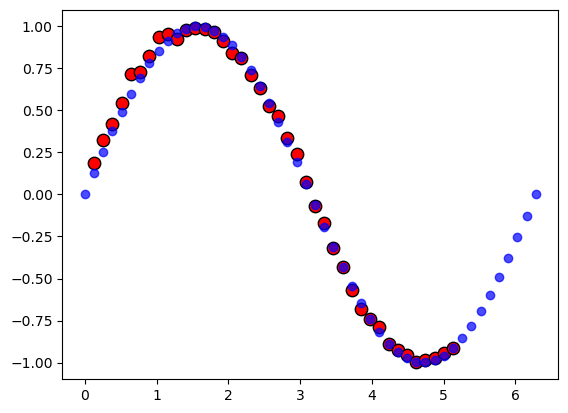

In [24]:
for i, prediction in enumerate(predictions[::length_sequence]):
    
    i *= length_sequence
    
    slice_x = x[i + 1: i + 1 + length_sequence]
    plt.scatter(slice_x, prediction, c='red', 
                edgecolor='black', s=80)
    
plt.scatter(x, y, alpha=0.7, c='blue')
plt.show()

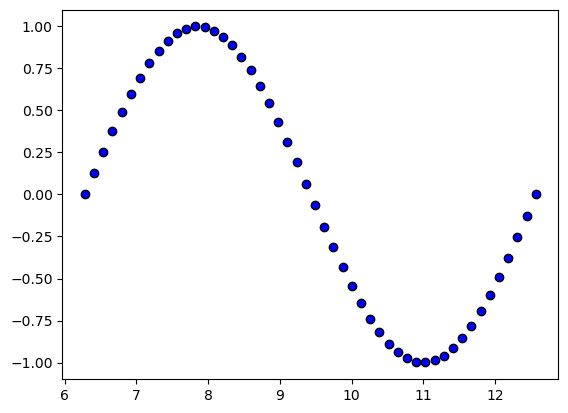

In [25]:
x_pred = np.linspace(x[-1], 2 * x[-1])
y_pred = np.sin(x_pred)

plt.scatter(x_pred, y_pred, c='blue', edgecolor='black')
plt.show()

In [26]:
inputs_test, targets_test = [], []

for i in range(len(x) - length_sequence):
    row = y_pred[i: i + length_sequence]
    target = y_pred[i + 1: i + length_sequence + 1]
    inputs_test.append([[j] for j in row])
    targets_test.append([target])

inputs = np.array(inputs_test)
targets = np.array(targets_test)

In [27]:
inputs_test[0], targets_test[0]

([[-2.4492935982947064e-16],
  [0.12787716168450614],
  [0.253654583909507],
  [0.37526700487937414],
  [0.4907175520039374],
  [0.5981105304912159],
  [0.6956825506034859],
  [0.7818314824680296],
  [0.8551427630053458],
  [0.9144126230158123]],
 [array([0.12787716, 0.25365458, 0.375267  , 0.49071755, 0.59811053,
         0.69568255, 0.78183148, 0.85514276, 0.91441262, 0.95866785])])

In [28]:
predictions_test = []

for x_t in inputs_test:
    lstm.forward([x_t])
    predict = [ouputs[1] for ouputs in lstm.outputs.items()]
    predictions_test.append(predict)

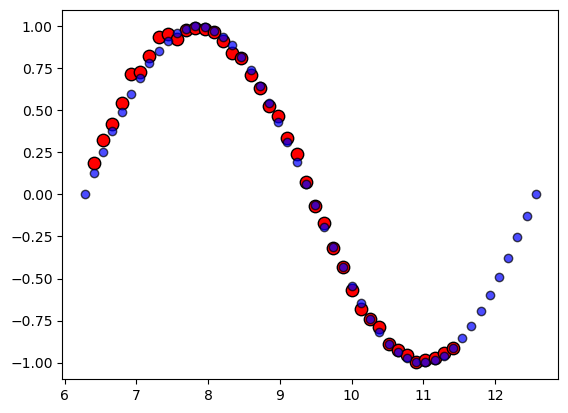

In [29]:
for i, prediction in enumerate(predictions_test[::length_sequence]):
    i *= length_sequence
    slice_x = x_pred[i + 1: i + 1 + length_sequence]
    plt.scatter(slice_x, prediction, c='red', 
                edgecolor='black', s=80)
    
plt.scatter(x_pred, y_pred, alpha=0.7, c='blue', edgecolor='black')
plt.show()